In [ ]:
#Cargamos los  datos.

from google.colab import files
uploaded = files.upload()

Saving adulto.csv to adulto.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Leemos el archivo.

alto = pd.read_csv('adulto.csv')
alto.head()  #Mostramos los primeros 5 regristros.

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
alto.shape

(32561, 15)

Tenemos un conjunto de datos que contiene 32,561 observaciones con 15 columnas relacionadas con diferentes parametros  financieros de la poblacion estadounidense, entre los que encontramos:
edad de las presonas, sexo, estatus marital, pais, ingresos -el cual esta proporcionado como una varibal boolena donde los valores indican si una persona gana mas o menos de 50k por año-, nivel mas alto de educaion, ocupacion, capital ganado, entre otras.

Vamos a  explorar los datos formulando preguntas como: "¿Es más probable que los hombres se conviertan en profesionales con altos ingresos que las mujeres, es decir, que reciban un ingreso de más de 50.000 dólares al año?"

In [ ]:
#Notamos que es preferible cambia el nombre de algunas columnas, asi que vamos a renombrar:

alto.columns = ['age', 'type_employer', 'fnlwgt', 'education',
                "education_num","marital", "occupation", "relationship", "race","sex",
                "capital_gain", "capital_loss", "hr_per_week","country","income"]

In [ ]:
alto.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
26858,66,Private,262285,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,99,United-States,<=50K
29187,31,Private,178370,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,0,99,United-States,>50K
18603,33,Self-emp-not-inc,67482,Assoc-voc,11,Divorced,Other-service,Unmarried,White,Female,0,0,99,United-States,<=50K
15460,37,Private,241174,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,99,United-States,>50K
25354,65,Private,89681,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,99,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19750,23,Private,72887,HS-grad,9,Never-married,Craft-repair,Own-child,Asian-Pac-Islander,Male,0,0,1,Vietnam,<=50K
22960,21,Private,184135,HS-grad,9,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,1,United-States,<=50K
20072,65,NaN,76043,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,1,United-States,>50K
24284,57,Self-emp-not-inc,56480,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,1,United-States,<=50K


In [ ]:
#Obtengamos mas informacion de nuestros datos:

alto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            32561 non-null  int64 
 1   type_employer  30725 non-null  object
 2   fnlwgt         32561 non-null  int64 
 3   education      32561 non-null  object
 4   education_num  32561 non-null  int64 
 5   marital        32561 non-null  object
 6   occupation     30718 non-null  object
 7   relationship   32561 non-null  object
 8   race           32561 non-null  object
 9   sex            32561 non-null  object
 10  capital_gain   32561 non-null  int64 
 11  capital_loss   32561 non-null  int64 
 12  hr_per_week    32561 non-null  int64 
 13  country        31978 non-null  object
 14  income         32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Con esto podemos identificar las columnas que son numericas y categoricas, ademas notamos que algunas columnas tienen valores faltantes.

In [ ]:
#Verifiquemos el uso en memoria de nuestos datos:

alto.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            32561 non-null  int64 
 1   type_employer  30725 non-null  object
 2   fnlwgt         32561 non-null  int64 
 3   education      32561 non-null  object
 4   education_num  32561 non-null  int64 
 5   marital        32561 non-null  object
 6   occupation     30718 non-null  object
 7   relationship   32561 non-null  object
 8   race           32561 non-null  object
 9   sex            32561 non-null  object
 10  capital_gain   32561 non-null  int64 
 11  capital_loss   32561 non-null  int64 
 12  hr_per_week    32561 non-null  int64 
 13  country        31978 non-null  object
 14  income         32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 19.8 MB


In [ ]:
#Vemoamos los principales estadisticos de las variables numericas:

alto.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hr_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


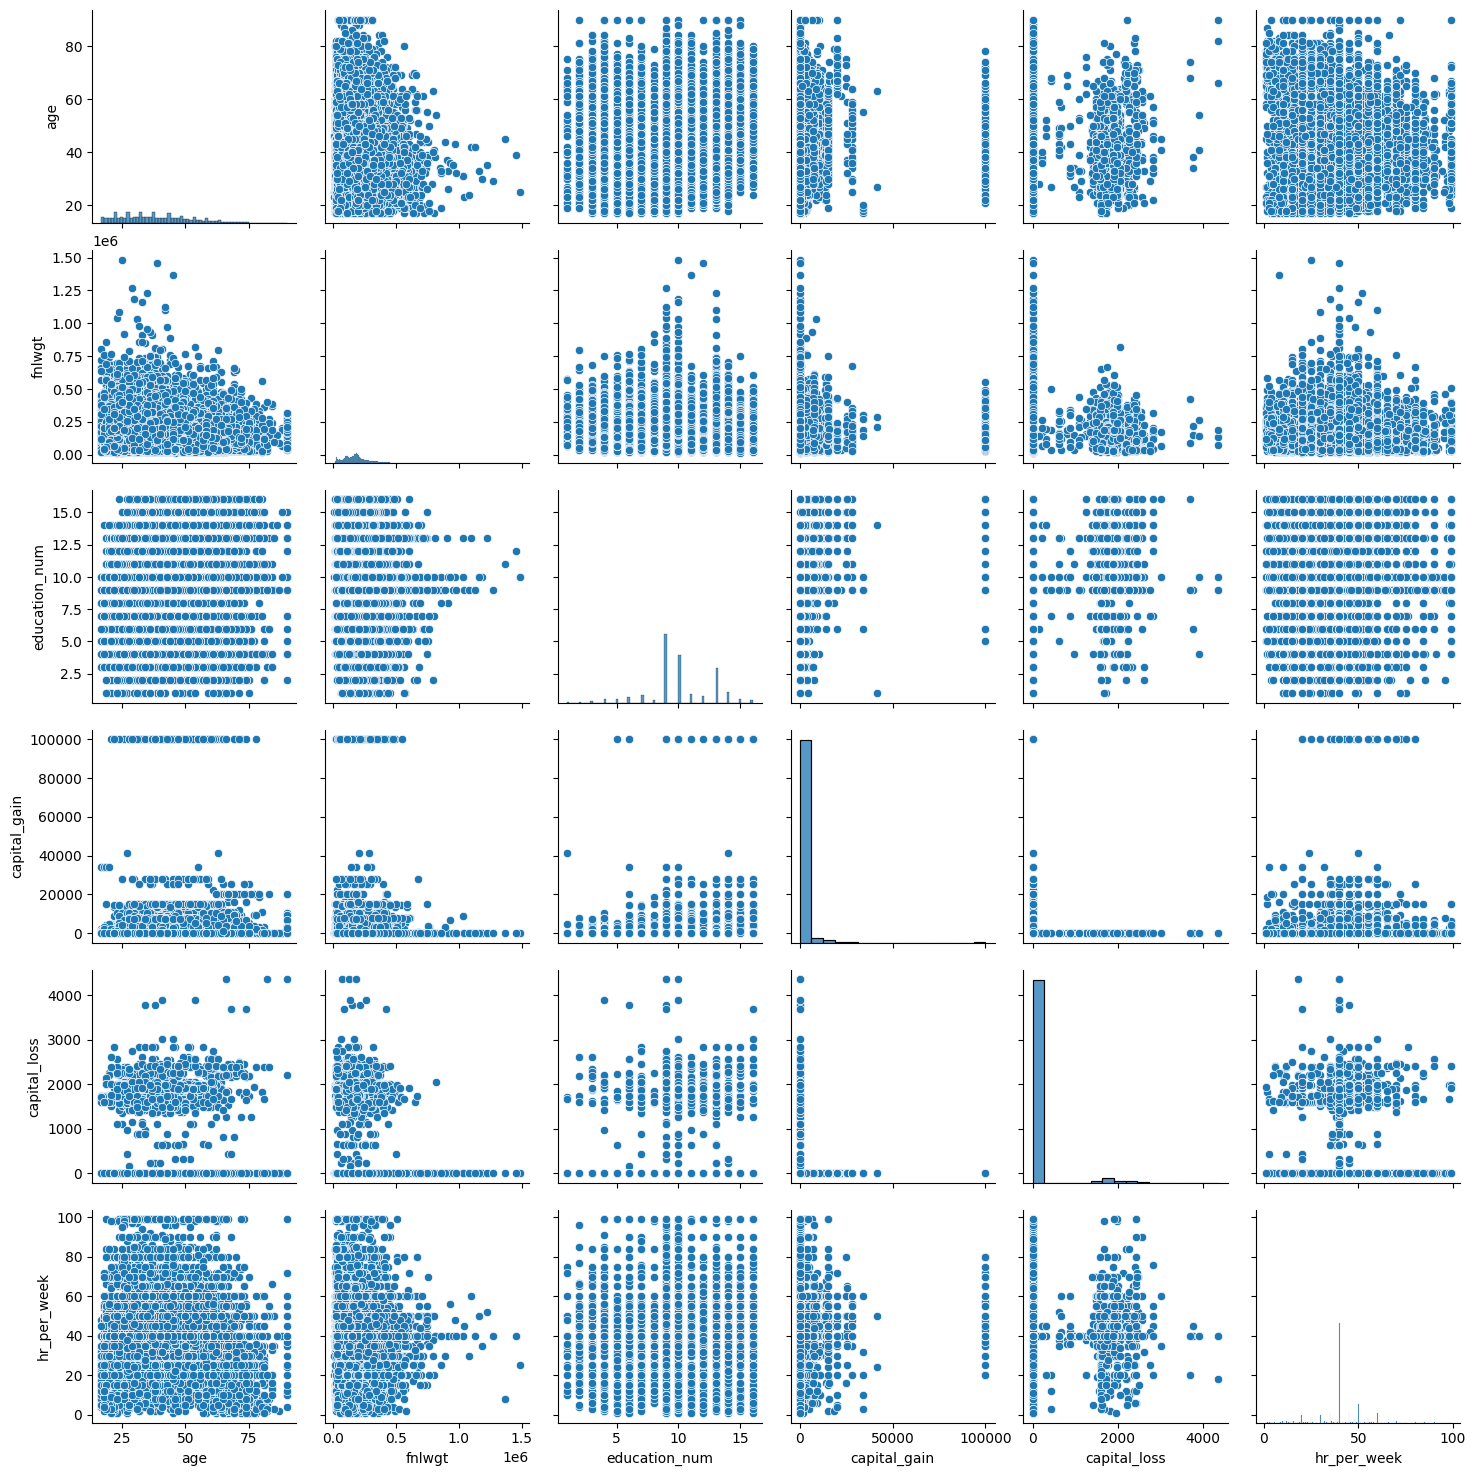

In [ ]:
#Hagamos una matriz de graficos de dispersion para visualizar posibles relaciones
#entre las variables numericas.

import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(alto)
plt.show()

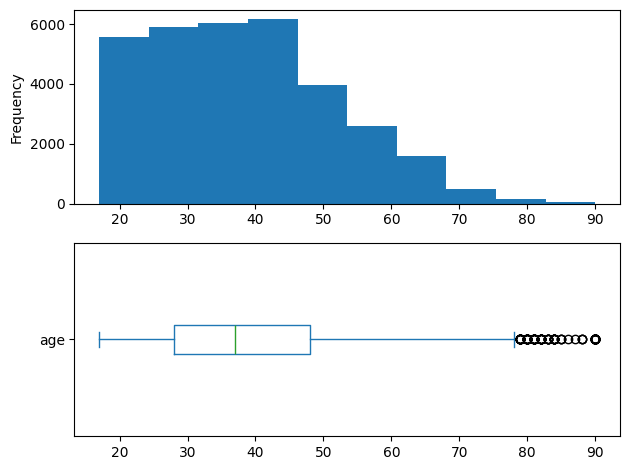

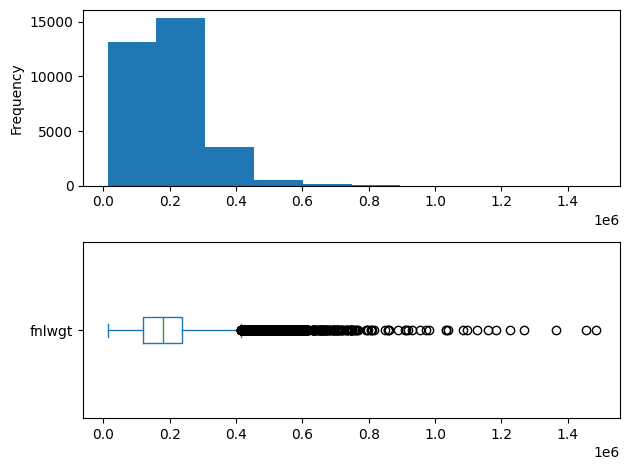

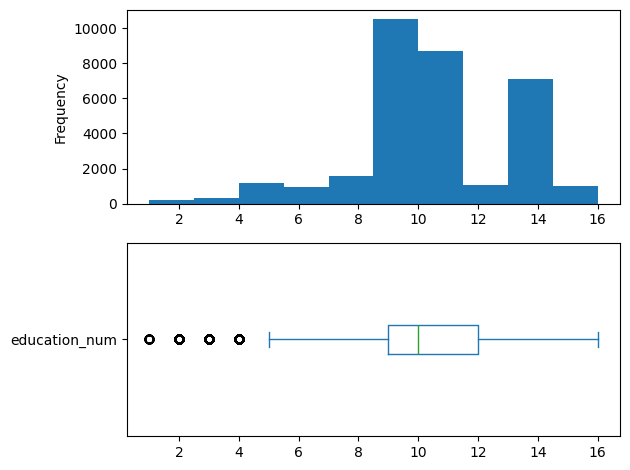

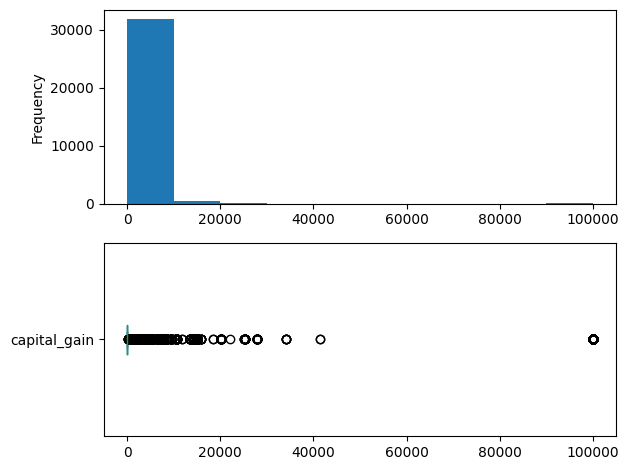

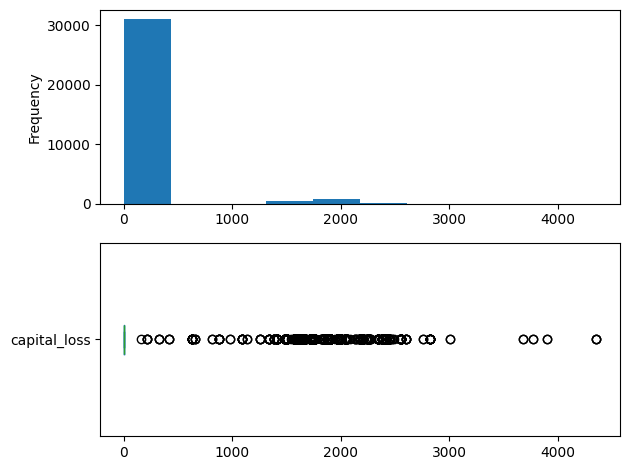

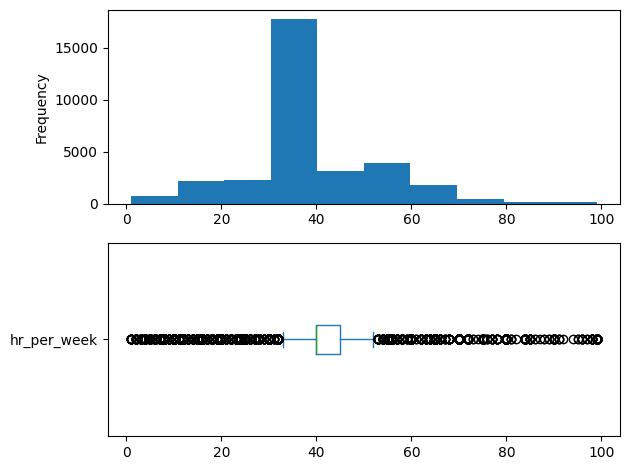

In [ ]:
#Realizemos los histogramas y graficos de caja para las variables numericas.

numeri = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
          'hr_per_week', ] #Identificamos las variable numericas.


for num in numeri:
  plt.subplot(2,1,1)
  alto[num].plot.hist()
  plt.subplot(2,1,2)
  alto[num].plot.box(vert=False)
  plt.tight_layout()
  plt.show()

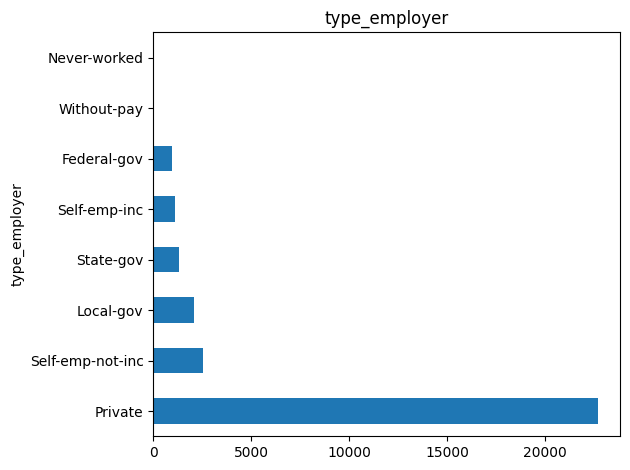

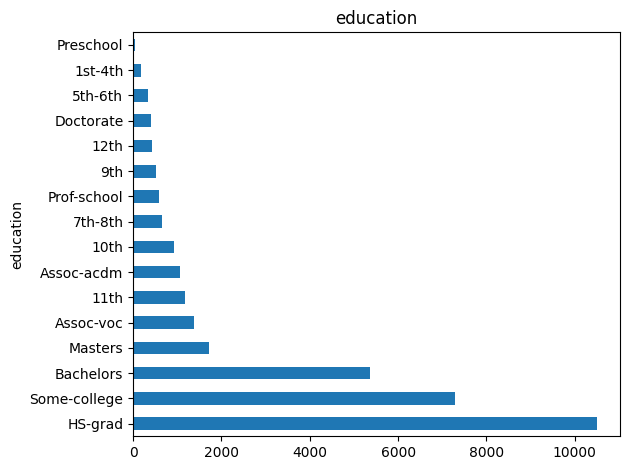

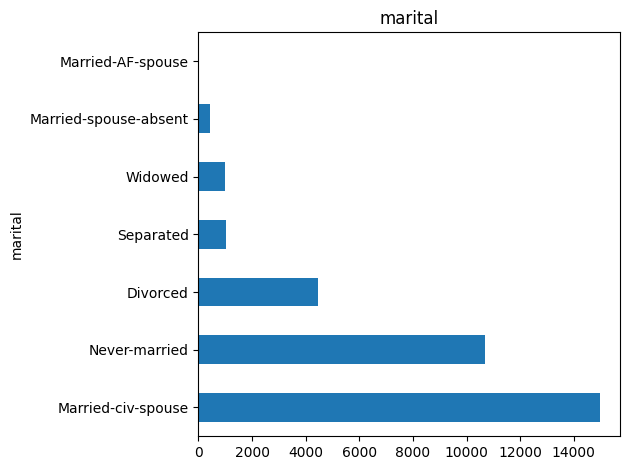

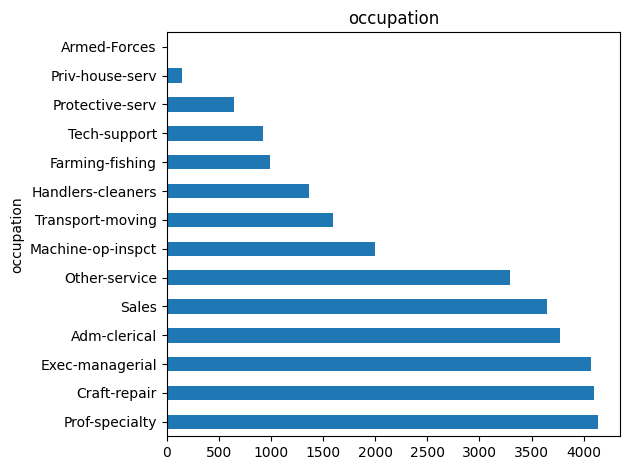

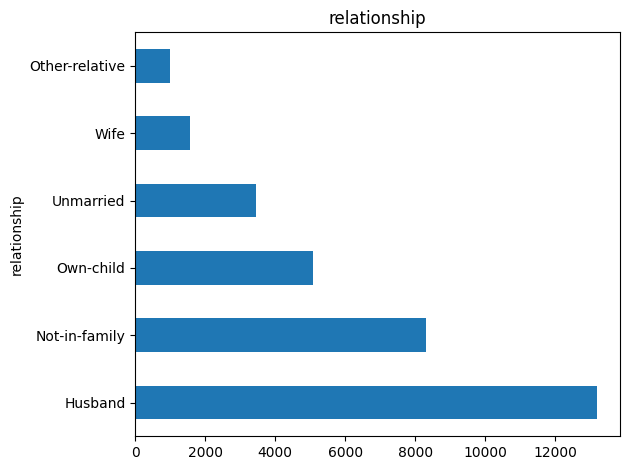

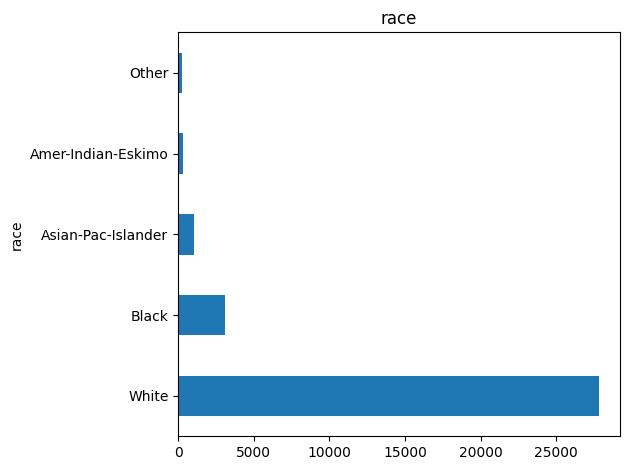

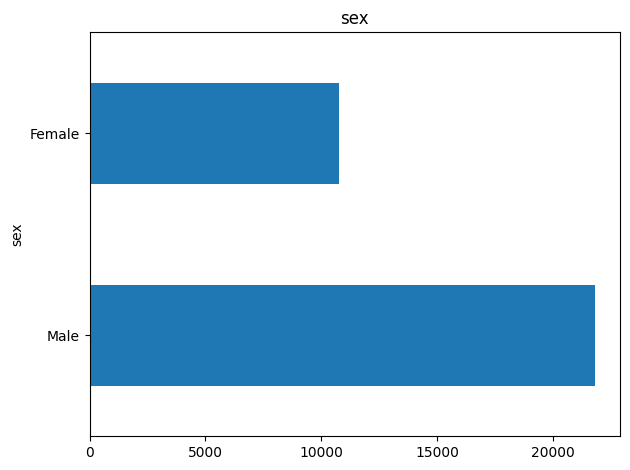

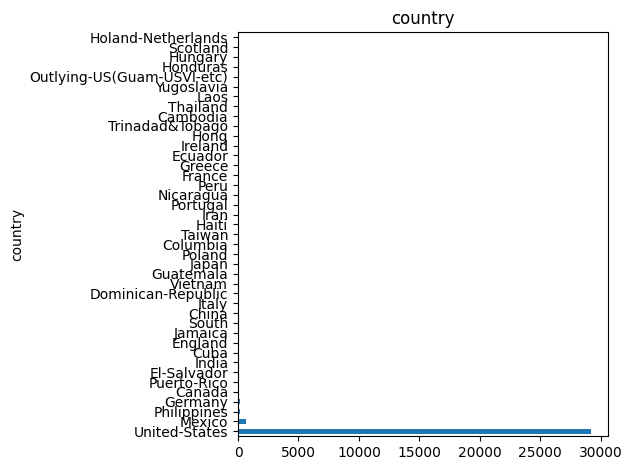

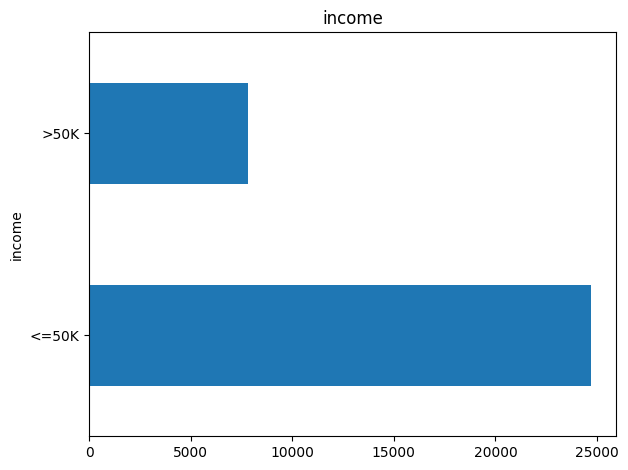

In [ ]:
#Para las variables categoricas vamos a relizar graficos de barras:

cate = ['type_employer', 'education', 'marital', 'occupation', 'relationship',
        'race', 'sex', 'country', 'income'] #Identificamos las variables categoricas.


for cat in cate:
  alto[cat].value_counts().plot.barh()
  plt.title(cat)
  plt.tight_layout()
  plt.show()

En la variable 'country' el unico valor es unite states, por lo que podemos prescindir de ella.

Grafiquemos el capital ganado contra el numero de educacion y su evolucion con la edad.

In [ ]:
ea = alto.age.unique()
ea

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87])

<ipython-input-29-49c47357b93f>:30: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


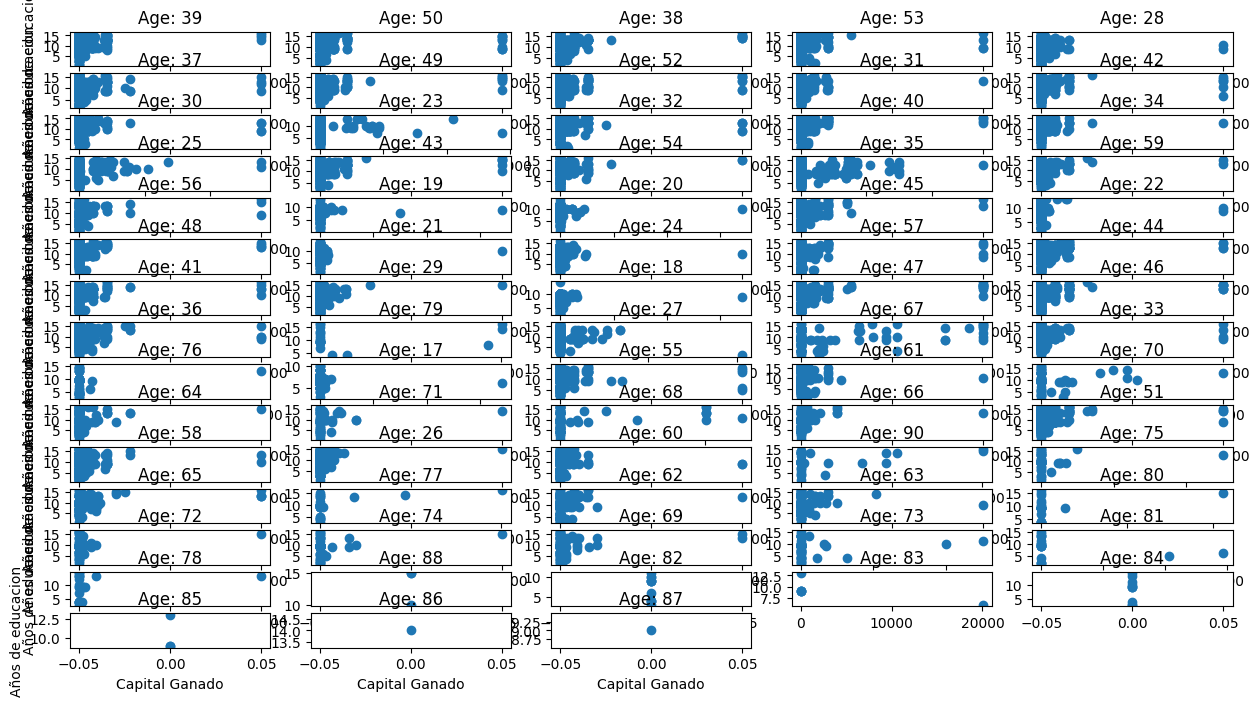

In [ ]:
plt.figure(figsize=(15, 8))

# Get unique ages
unique_ages = alto.age.unique()
num_ages = len(unique_ages)

# Calculate grid dimensions (5 columns, rows as needed)
ncols = 5
nrows = (num_ages + ncols - 1) // ncols  # Round up division

for i, age in enumerate(unique_ages):
    # Filter data for current age
    age_data = alto[alto.age == age]
    X = age_data.capital_gain
    Y = age_data.education_num

    plt.subplot(nrows, ncols, i+1)
    plt.scatter(X, Y)
    plt.title(f"Age: {age}")

    # Set limits if needed, but consider your actual data range
    # plt.xlim([X.min(), X.max()])  # Or use sensible defaults
    # plt.ylim([Y.min(), Y.max()])

    if i % ncols == 0:  # First column
        plt.ylabel('Años de educacion')
    if i >= (nrows - 1) * ncols:  # Last row
        plt.xlabel('Capital Ganado')

plt.tight_layout()
plt.show()

Veremos visualmente el cambio de education_num contra capital_gain con la edad.

In [ ]:
def plotage(age):
  mb = alto.age == age
  X = alto[mb].capital_gain
  Y = alto[mb].education_num

  plt.scatter(X,Y)
  plt.xlabel('Capital')
  plt.ylabel('eucacion')
  plt.show()

In [ ]:
#Cuando utlizamos la funcion info(), podemos notar que la variable 'country'
#tiene valores perdidos, vamos a rellenar esos campos.

alto['country'] = alto['country'].fillna('unknow')

In [ ]:
#Contemos el numero de elementos por pais.

alto.groupby('country').size()

,0
country,
Cambodia,19
Canada,121
China,75
Columbia,59
Cuba,95
Dominican-Republic,70
Ecuador,28
El-Salvador,106
England,90


In [ ]:
#Dividamos nuestros datos en dos grupos de acuerdo a su genero: hombre o mujer.

ml = alto[alto.sex == 'Male']
fm = alto[alto.sex == 'Female']

In [ ]:
#Pongamos atencion a los profesionales con altos ingresos separados por sexo.

ml1 = alto[(alto.sex == 'Male') & (alto.income == '>50K')]
fm1 = alto[(alto.sex == 'Female') &(alto.income == '>50K')]

#Analisis Exploratorio.

Los datos obtenidos al realizar una medición específica en todos los sujetos de una muestra representan nuestras observaciones para una sola característica, como país, edad, educación, etc. Estas mediciones y categorías representan la distribución muestral de la variable, que a su vez representa aproximadamente la distribución poblacional de la variable. Uno de los principales objetivos del análisis exploratorio de datos es visualizar y resumir la distribución muestral, lo que nos permite realizar suposiciones provisionales sobre la distribución poblacional.

In [ ]:
#Tabulemos la proporcion de profesionales con altos ingresos:

gran = alto[alto.income == '>50K']

print('La tasa de personas con altos ingresos es: ', round(len(gran)/float(len(alto))*100, 2), '%')
print('La tasa de hombres con altos ingresos es: ', round(len(ml1)/float(len(ml))*100,2), '%')
print('La tasa de mujeres con altos ingresos es ', round(len(fm1)/float(len(fm))*100,2), '%')

La tasa de personas con altos ingresos es:  24.08 %
La tasa de hombres con altos ingresos es:  30.57 %
La tasa de mujeres con altos ingresos es  10.95 %


In [ ]:
#Calculemos la media de sus edades:

print('La meia e la ea e los hombres es: ', round(ml['age'].mean(),2))
print('La meia e la ea e las mujeres es: ', round(fm['age'].mean(),2))
print('La meia e los hombres con altos ingresos es: ', round(ml1['age'].mean(),2))
print('La meia e la ea e las mujeres con altso ingresos es: ', round(fm1['age'].mean(),2))

La meia e la ea e los hombres es:  39.43
La meia e la ea e las mujeres es:  36.86
La meia e los hombres con altos ingresos es:  44.63
La meia e la ea e las mujeres con altso ingresos es:  42.13


In [ ]:
#Calculemos la media y la varianza de las horas por semana para hombres y mujeres.

mlmu = ml['hr_per_week'].mean()
flmu = fm['hr_per_week'].mean()
mlvar = ml['hr_per_week'].var()
fmvar = ml['hr_per_week'].var()
mlstd = ml['hr_per_week'].std()
fmstd = ml['hr_per_week'].std()


print('Estadisticas de las horas por semana para los hombres: mu::',
      round(mlmu,2), 'var:', round(mlvar,2),'std:', round(mlstd,2))
print('Estadisticas de las horas por semana para las mujeres:: mu:',
      round(flmu,2),'var:', round(fmvar,2), 'std:', round(fmstd,2))

Estadisticas de las horas por semana para los hombres: mu:: 42.43 var: 146.89 std: 12.12
Estadisticas de las horas por semana para las mujeres:: mu: 36.41 var: 146.89 std: 12.12


In [ ]:
#Calculemos las medianas de la edad de los hombres y mujeres con altos ingresos:

mlme = ml['age'].median()
fmme = fm['age'].median()
print('La mediana de la edad de hombres y mujeres son: ', mlme, 'y', fmme, 'respectivamente')
ml1me = ml1['age'].median()
fm1me = fm1['age'].median()
print('La mediana de la edad de hombres y mujeres con altos ingresos es: ',
      ml1me, 'y', fm1me, 'respectivamente.')

La mediana de la edad de hombres y mujeres son:  38.0 y 35.0 respectivamente
La mediana de la edad de hombres y mujeres con altos ingresos es:  44.0 y 41.0 respectivamente.


#Quantiles y Percentiles.

A veces estamos interesados en como se distribuyen los datos en general.

Podemos ordenar las muestras y encontrar un $x_p$ tal que divida los datos en dos partes donde:

* Una fraccion p de los valores en los datos es menor o igual a $x_p$

* La fraccion restante (1-p) es mayor que $x_p$.


Este valor $x_p$ is el p-esimo quantil, o el  100 × p-esimo percentil. Por ejemplo, un resumen de 5 numeros se define con los valores $x_{min}$, Q1, Q2, Q3, $x_{max}$, donde Q1 es 25 × p-esimo percentil, Q2 es el 50 × p-esimo percentil and Q3 is the 75 × p-esimo percentil.

Resumir los datos simplemente observando su media, mediana y varianza puede ser peligroso: datos muy diferentes pueden describirse con las mismas estadísticas. Lo mejor para validar los datos es inspeccionandolos. Podemos observar la distribución de los datos, que describe la frecuencia de aparición de cada valor (es decir, su frecuencia).

La ​​representación más común de una distribución es un histograma.

Mostremos la edad de los hombres y mujeres por separado.

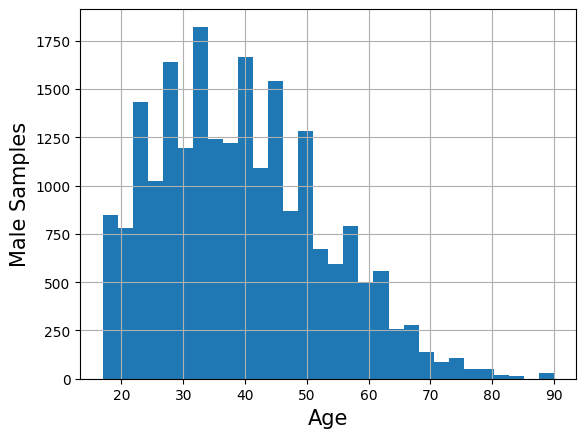

In [ ]:
mlage = ml['age'].hist(density=False, histtype='stepfilled', bins =30)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Male Samples', fontsize=15)
plt.show()

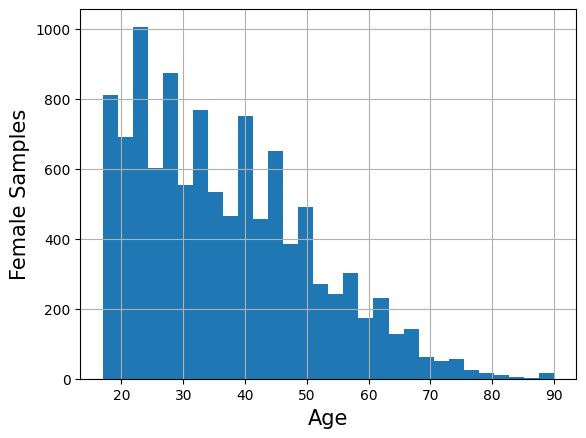

In [ ]:
fmage = fm['age'].hist(density=False, histtype='stepfilled', bins = 30)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Female Samples', fontsize=15)
plt.show()

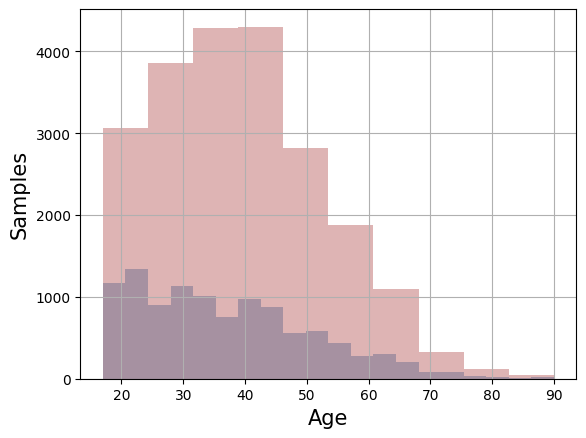

In [ ]:
#Pongamoslos en la misma grafica para compararlos:

import seaborn as sns

mlage = ml['age']
fmage = fm['age']

fmage.hist(density=False, histtype='stepfilled', alpha=.5, bins=20)   # default number of bins = 10
mlage.hist(density=False, histtype='stepfilled', alpha=.5, color=sns.desaturate("indianred", .75), bins=10)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Samples',fontsize=15)
plt.show()

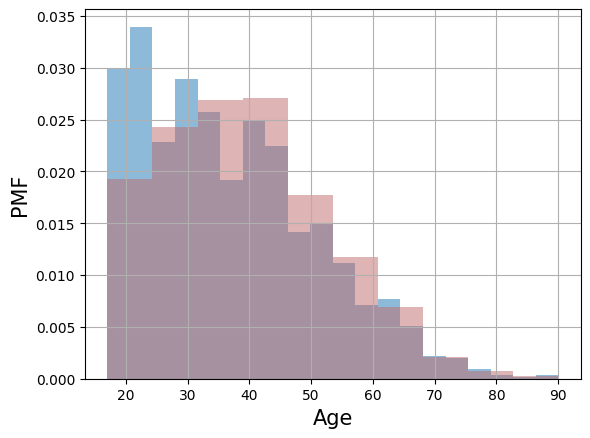

In [ ]:
fmage.hist(density=True, histtype='stepfilled', alpha=.5, bins=20)   # default number of bins = 10
mlage.hist(density=True, histtype='stepfilled', alpha=.5, color=sns.desaturate("indianred", .75), bins=10)
plt.xlabel('Age',fontsize=15)
plt.ylabel('PMF',fontsize=15)
plt.show()

La **Función de Distribución Acumulada**, o simplemente función de distribución, describe la probabilidad de que una variable aleatoria real X, con una distribución de probabilidad dada, tenga un valor menor o igual a x.

Mostramos la Funcion de Distribucion Acumulada de la distribución por edad tanto para hombres como para mujeres.

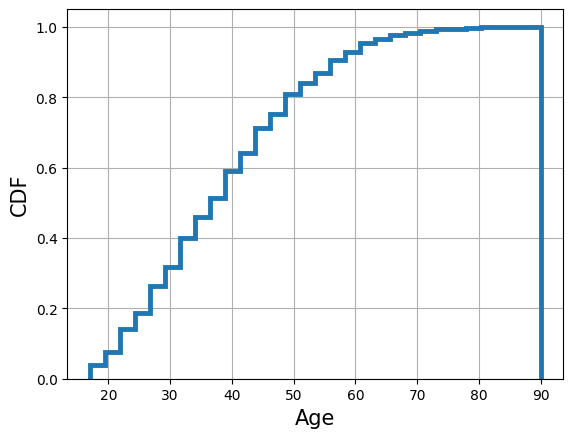

In [ ]:
mlage.hist(density=True, histtype='step', cumulative=True,
           linewidth=3.5, bins=30)
plt.xlabel('Age', fontsize=15)
plt.ylabel('CDF', fontsize=15)
plt.show()

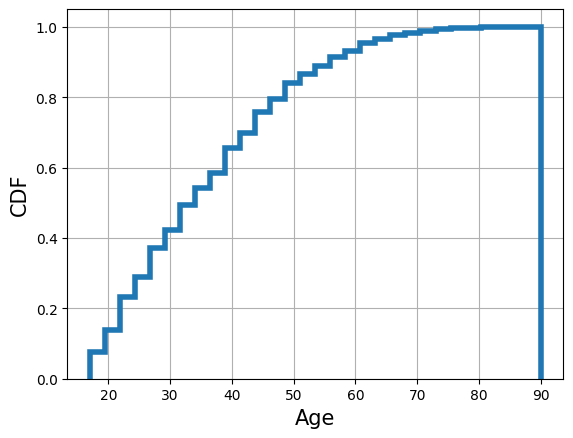

In [ ]:
fmage.hist(density=True, histtype='step', cumulative=True, linewidth=4, bins=30)
plt.xlabel('Age', fontsize=15)
plt.ylabel('CDF', fontsize=15)
plt.show()

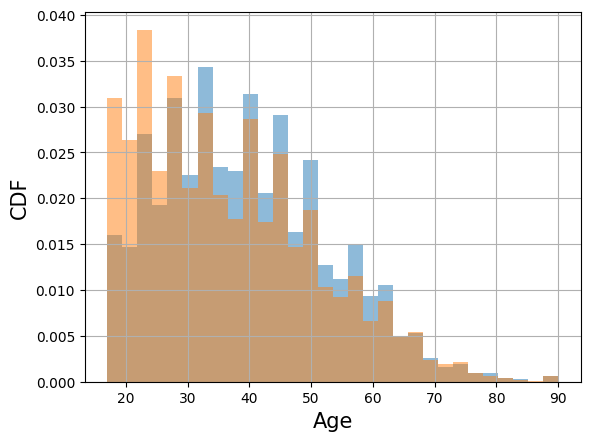

In [ ]:
mlage.hist(bins=30, density=True, histtype='stepfilled', alpha=0.5)
fmage.hist(bins=30, density=True, histtype='stepfilled', alpha=0.5)
plt.xlabel('Age', fontsize=15)
plt.ylabel('CDF', fontsize=15)
plt.show()

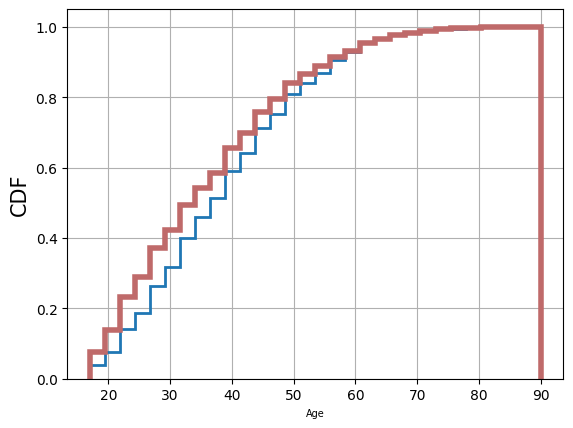

In [ ]:
mlage.hist(density=True, histtype='step', cumulative=True, linewidth=2, bins=30)
fmage.hist(density=True, histtype='step', cumulative=True, linewidth=4,
           bins=30, color=sns.desaturate('indianred', 0.75))
plt.xlabel('Age', fontsize=7)
plt.ylabel('CDF', fontsize=15)
plt.show()

In [ ]:
print('La diferencia de las medias de las muestra entre hombres y mujeres es: ',
      round(mlage.mean()- fmage.mean(), 2))

La diferencia de las medias de las muestra entre hombres y mujeres es:  2.58


# Tratamiento de valores atipicos.

Los valores atipicos son muestras de datos con un valor alejado de la tendencia central. Se pueden definir diferentes reglas para detectarlos:

* Calcular muestras que esten alejadas de la media.

* Calcular muestras cuyos valores superen la media en 2 o 3 desviaciones estandar.

En nuestro caso nos interesan las estadisticas de hombres y mujeres con altos ingresos, observamos que en nuestros datos la edad minima es de 17 años mientras que la maxima registrada es de 90 años. Podemos considerar que algunas de estas muestras son debido a errores o no son representativas. Concentremonos en la mediana de la edad, que es 37 - calculada a continuacion-, hasta los 22 y 72 años considerando el resto como valores atipicos.

In [ ]:
alto.age.median()

37.0

In [ ]:
#Veamos cuantos outliers encontramos en las muestras:

len(alto[(alto.income == '>50K') & (alto['age'] < alto['age'].median() - 15)])

5

In [ ]:
len(alto[(alto.income == '>50K') & (alto['age'] > alto['age'].median() +35)])

69

In [ ]:
#Eliminemos los valores mas altos y mas bajos:

aulto = alto.drop(alto.index[(alto.income == '>50K') &
 (alto['age']>alto['age'].median() + 35) &
                             (alto['age']>alto['age'].median()-15)])
aulto

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
ml1age = ml1['age']
fm1age = fm1['age']

ml2age = ml1age.drop(ml1age.index[(ml1age>alto['age'].median()+35) &
                                  (ml1age>alto['age'].median() +35)])

fm2age = fm1age.drop(fm1age.index[(fm1age>alto['age'].median() + 35) &
                                  (fm1age>alto['age'].median() -15)])

In [ ]:
#Veamos los nuevos valores para la media y la mediana despues de haber eliminado algunos valores.

mu2ml = ml2age.mean()
std2ml = ml2age.std()
md2ml = ml2age.median()

print('Estadisticas para hombres: Media: ', mu2ml, 'Std: ', std2ml,
      'Mediana: ', md2ml, 'Minimo: ', ml2age.min(),
      'Maximo: ', ml2age.max())

Estadisticas para hombres: Media:  44.317982123920615 Std:  10.019749857171412 Mediana:  44.0 Minimo:  19 Maximo:  72


In [ ]:
#Veamos los nuevos valores para las mujeres despues de haber eado algunos valores:

mu3fm = fm2age.mean()
std3fm = fm2age.std()
md3ml = fm2age.median()

print('Estacisticas para mujers: Media: ', mu3fm, 'Std: ', std3fm,
      'Mediana: ', md3ml, 'Minimo: ', fm2age.min(), 'Maximo: ', fm2age.max())

Estacisticas para mujers: Media:  41.877028181041844 Std:  10.036441807343714 Mediana:  41.0 Minimo:  19 Maximo:  72


In [ ]:
print('La diferencia media con los valores atipicos es: %4.2f.' %(mlage.mean() -
                                                                  fmage.mean()))
print('La diferencia media sin los valores atipicos es: %4.2f.' % (ml2age.mean() -
                                                                   fm2age.mean()))

La diferencia media con los valores atipicos es: 2.58.
La diferencia media sin los valores atipicos es: 2.44.


Text(0.5, 0, 'Samples')

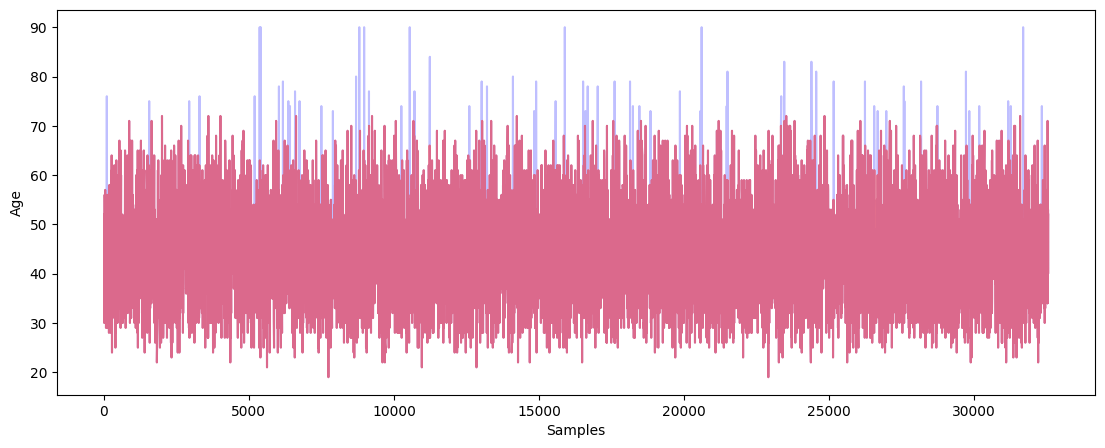

In [ ]:
#Visualizemos los valores atipicos que se han removido:

plt.figure(figsize=(13.4,5))

alto.age[(alto.income == '>50K')].plot(alpha=0.25, color = 'blue')
aulto.age[(aulto.income=='>50K')].plot(alpha=0.45, color = 'red')

plt.ylabel('Age')
plt.xlabel('Samples')

In [ ]:
import numpy as np

countx,divisionx = np.histogram(ml2age, density=True)
county,divisiony = np.histogram(fm2age, density=True)

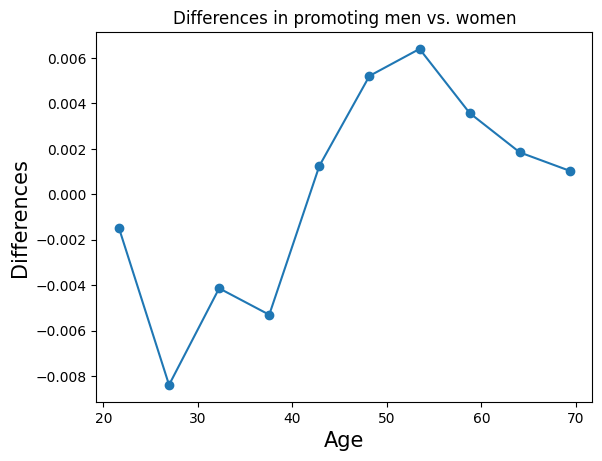

In [ ]:
import matplotlib.pyplot as plt

val = [(divisionx[i]+divisionx[i+1])/2 for i in range(len(divisionx)-1)]
plt.plot(val, countx-county, 'o-')
plt.title('Differences in promoting men vs. women')
plt.xlabel('Age',fontsize=15)
plt.ylabel('Differences',fontsize=15)
plt.show()

In [ ]:
# The difference between the mean values of male and female populations.
(print("Remember:\n We have the following mean values for men, women and the difference:\nOriginally: ",
       mlage.mean(), fmage.mean(), mlage.mean()- fmage.mean()))
# The difference between the mean values of male and female populations.
print("For high-income: ", ml1age.mean(), fm1age.mean(),
      ml1age.mean()- fm1age.mean())
# The difference between the mean values of male and female populations.
print("After cleaning: ", ml2age.mean(), fm2age.mean(),
      ml2age.mean()- fm2age.mean())

print("\nThe same for the median:")
# The difference between the mean values of male and female populations.
print(mlage.median(), fmage.median(), mlage.median()- fmage.median())
# The difference between the mean values of male and female populations.
print(ml1age.median(), fm1age.median(), ml1age.median()- fm1age.median())
# The difference between the mean values of male and female populations.
print(ml2age.median(), fm2age.median(), ml2age.median()- fm2age.median())

Remember:
 We have the following mean values for men, women and the difference:
Originally:  39.43354749885268 36.85823043357163 2.5753170652810553
For high-income:  44.62578805163614 42.125530110262936 2.5002579413732064
After cleaning:  44.317982123920615 41.877028181041844 2.440953942878771

The same for the median:
38.0 35.0 3.0
44.0 41.0 3.0
44.0 41.0 3.0


# Medición de la asimetría: asimetría y mediana de Pearson Coeficiente de asimetría.

Para datos univariados, la fórmula de asimetría es una estadística que mide la asimetría del conjunto de n muestras de datos, $x_i$:

In [ ]:
def asime(x):
  res = 0
  m = x.mean()
  s = x.std()
  for i in x:
    res+=(i-m)*(i-m)*(i-m)
    res/=(len(x)*s*s*s)
    return res


print('La asimetria de la poblacion de hombres es: ', asime(ml2age))
print('La asimetria de la poblacion de mujeres es: ', asime(fm2age))

La asimetria de la poblacion de hombres es:  6.827246272498504e-05
La asimetria de la poblacion de mujeres es:  -0.0010870125384575592


Una desviación negativa indica que la distribución se inclina hacia la izquierda (se extiende más hacia la izquierda que hacia la derecha). Es fácil ver que la asimetría de una distribución normal es cero, y cualquier dato simétrico debe tener una asimetría igual a cero. Cabe destacar que la asimetría puede verse afectada por valores atípicos.

**El coeficiente de asimetría mediana de Pearson** es una alternativa más robusta al coeficiente de asimetría.

In [ ]:
def pearson(x):
  return 3*(x.mean() - x.median())/x.std()

print('El coeficiente de Pearson de los hombres es: ',
      pearson(ml2age))
print('El coeficiente de Pearson de las mujeres es: ',
      pearson(fm2age))

El coeficiente de Pearson de los hombres es:  0.0952066054901639
El coeficiente de Pearson de las mujeres es:  0.2621531209596965


# Riesgo relativo.

Supongamos que una persona asciende 'anticipadamente' si asciende antes de los 41 años, a tiempo si asciende entre los 41, 42, 43 o 44 años, y tarde si asciende y obtiene ingresos superiores a 50.000 después de los 44 años. Calculemos la probabilidad de ascenso anticipado, a tiempo y tardío para hombres y mujeres:

In [ ]:
ml2 = ml1.drop(ml1.index[(ml1['age'] > alto['age'].median()+35) & (ml1['age']>
                                                                   alto['age'].median()-15)])

fm2 = fm1.drop(fm1.index[(fm1['age']>alto['age'].median() +35) &(
    fm1['age'] > alto['age'].median() -15
)])


print(ml2.shape, fm2.shape)

(6601, 15) (1171, 15)


In [ ]:
print('Hombres agrupados en tres categorias: ')
print('Jovenes: ', int(round(100*len(ml2age[ml2age<41])/float(len(ml2age.index)))), '%.')
print('Viejos: ', int(round(100*len(ml2age[ml2age>44])/float(len(ml2age.index)))), '%.')
print('Edad media: ', int(round(100*len(ml2age[(ml2age>40) & (ml2age<45)])/float(len(ml2age.index)))), '%.')

Hombres agrupados en tres categorias: 
Jovenes:  38 %.
Viejos:  48 %.
Edad media:  14 %.


In [ ]:
print("Mujeres agrupadas en tres categorias: ")
print("Jovenes: ",int(round(100*len(fm2age[fm2age <41])/float(len(fm2age.index)))),"%.")
print("Viejas: ", int(round(100*len(fm2age[fm2age >44])/float(len(fm2age.index)))),"%.")
print("De edad media: ", int(round(100*len(fm2age[(fm2age>40) & (fm2age< 45)])/float(len(fm2age.index)))),"%.")

Mujeres agrupadas en tres categorias: 
Jovenes:  48 %.
Viejas:  37 %.
De edad media:  15 %.


El riesgo relativo es el cociente de dos probabilidades. Para obtener el riesgo relativo de un ascenso temprano, debemos considerar el cociente de ambas probabilidades.

In [ ]:
print('El promedio de los hombres: ', round(ml2age.mean(), 3))
print('El promedio de las mujeres: ', round(fm2age.mean(), 3))

El promedio de los hombres:  44.318
El promedio de las mujeres:  41.877


In [ ]:
ml2joven = len(ml2age[(ml2age<41)])/float(len(ml2age.index))
fm2joven = len(fm2age[(fm2age<41)])/float(len(fm2age.index))
print('El riesgo relativo para una promocion temprana para las mujeres es: ',
      100*(1-ml2joven/fm2joven))

El riesgo relativo para una promocion temprana para las mujeres es:  21.125440082163816


Esto significa que las mujeres tienen un 21% más de posibilidades de conseguir altos ingresos antes de los 41 años que los hombres.

In [ ]:
ml2viejo = len(ml2age[(ml2age>44)])/float(len(ml2age.index))
fm2vieja  = len(fm2age[(fm2age>44)])/float(len(fm2age.index))
print('El riesgo relativo para una promocion tardia para los hombres es: ',
      100*ml2viejo/fm2vieja)

El riesgo relativo para una promocion tardia para los hombres es:  128.9715708971242


# Distrubuciones Continuas.

Hemos construido distribuciones empíricas (que representan las distribuciones de valores en una muestra) basadas en observaciones, pero muchos problemas reales se aproximan bien mediante el ajuste de funciones de distribución continua (CDF).

Se denominan así porque la distribución se describe mediante una función continua analítica.

# La Distribucion Exponencial.

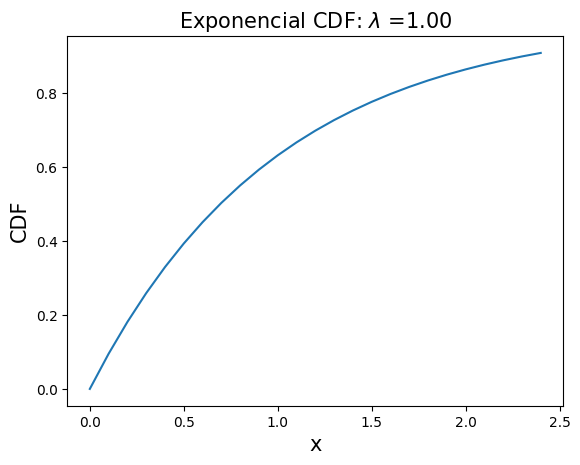

In [ ]:
l = 3
x = np.arange(0,2.5,0.1)
y = 1 - np.exp(-1*x)
plt.plot(x,y, '-')
plt.title('Exponencial CDF: $\lambda$ =%.2f' %1, fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel('CDF', fontsize=15)
plt.show()

El numero que multiplica a la x en la funcion exponencial es conocido como lambda,

este valor determina la media de la distribucion: $1/λ$,

la varianza: $1/λ^2$

y la mediana:$ln(2)/λ$

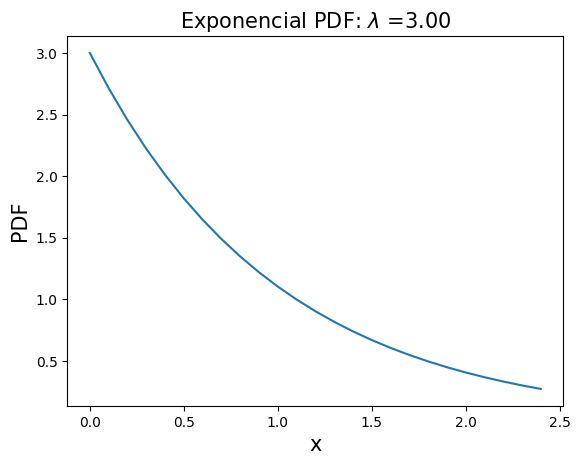

In [ ]:
from __future__ import division
import scipy.stats as stats

l=3
x=np.arange(0, 2.5, 0.1)
y = l*np.exp(-1*x)
plt.plot(x,y, '-')
plt.title('Exponencial PDF: $\lambda$ =%.2f' % l, fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.show()

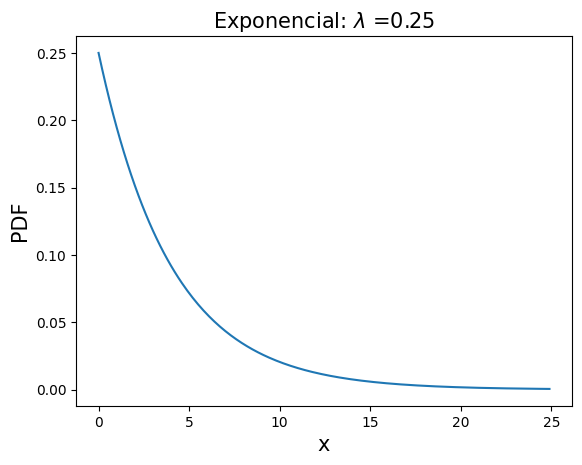

In [ ]:
l = 0.25
x = np.arange(0,25, 0.1)
y = l*np.exp(-l*x)
plt.plot(x,y,'-')
plt.title('Exponencial: $\lambda$ =%.2f' % l, fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.show()

# Distribucion Normal.

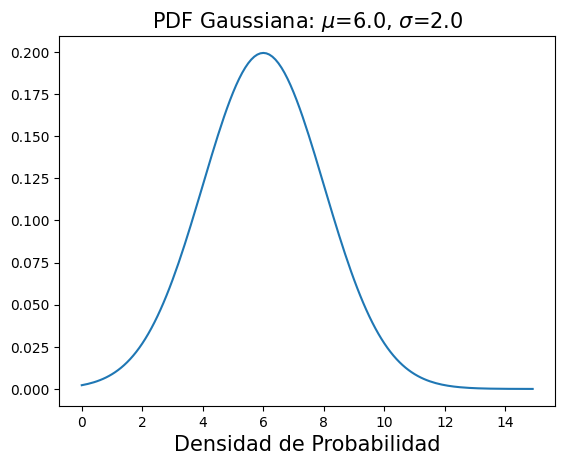

In [ ]:
u = 6  #media
s = 2 #desviacion estandar
x=np.arange(0,15,0.1)
y = (1/(np.sqrt(2*np.pi*s*s)))*np.exp(-(((x-u)**2)/(2*s*s)))
plt.plot(x,y,'-')
plt.title('PDF Gaussiana: $\mu$=%.1f, $\sigma$=%.1f' % (u,s), fontsize=15)
plt.xlabel('Densidad de Probabilidad', fontsize=15)
plt.show()

Si tomamos la media de n muestras aleatorias de una distribucion arbitraria con desviacion estandar $\sigma$ y media $μ$. A medida que n aumenta la distibucion de la media muestral siempre convergera a una distribucion Gaussiana con media $\mu$ y desviacion estandar $\sigma / \sqrt(n)$

Consideremos la distribucion uniforme, la cual, claramente no es normal o Gaussiana.

Para calcular un promedio, extraemos dos muestras (n=2) aleatoriamente de la distribución original y se promedian. Luego, extraemos otra muestra de dos y se calcula otro valor del promedio. Este proceso se repite una y otra vez, y se calculan los promedios de dos en dos.

Al tomar repetidamente más elementos (n=3,4,5,...) de la distribución principal y calcular los promedios, se obtiene una densidad de probabilidad normal.

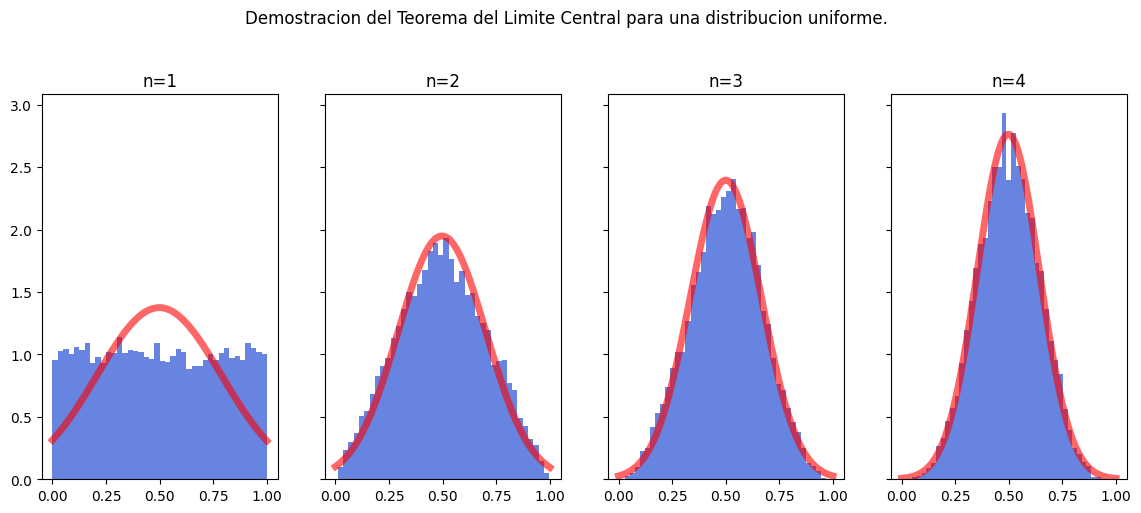

In [ ]:
fig, ax= plt.subplots(1,4, sharey=True, squeeze=True, figsize=(14,5))
x = np.linspace(0,1,100)
for i in range(4):
  f = np.mean(np.random.random((10000, i+1)), 1)
  m,s = np.mean(f), np.std(f, ddof=1)
  fn = (1/(s*np.sqrt(2*np.pi)))*np.exp(-(x-m)**2/(2*s**2)) #pdf normal.
  ax[i].hist(f, 40, density=True, color=[0, 0.2, 0.8, 0.6])
  ax[i].set_title('n=%d' %(i+1))
  ax[i].plot(x, fn, color=[1,0,0,0.6], linewidth=5)
plt.suptitle('Demostracion del Teorema del Limite Central para una distribucion uniforme.',
             y = 1.05)
plt.show()